# Redes Neuronales Convolucionales

## Rock, Paper, Scissors

## Ejemplo Rock, Paper, Scissors

Dataset tomado de: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

### Importar Tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping

## Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Es importante verificar que "folder" contenta una ruta de tu drive donde
# estén guardadas las imágenes que se vayan a procesar.
folder = '/content/drive/My Drive/CIC/Reconocimiento de patrones/rps-cv-images/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Generar el dataset
Como el dataset está guardado en nuestra computadora, debemos cargarlo y generar los datos para entrenamiento y para prueba.
El dataset Rock-Paper-Scissor cuenta con 2188 imágenes divididas en tres clases: Rock (726 imágenes), Paper (710) y Scissor (752). Todas las imágenes son en RGB de tamaño 300x200 px.

In [ ]:
train_data = ImageDataGenerator(
                rescale = 1.0/255,
                rotation_range=20,
                width_shift_range=0.2,
                height_shift_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest',
                validation_split=0.25
                )

train_generator = train_data.flow_from_directory(
                folder,
                batch_size=32,
                class_mode='categorical',
                target_size=(60, 40),
                subset='training')

validation_data = ImageDataGenerator(rescale = 1.0/255,
                                    validation_split=0.25)


validation_generator = validation_data.flow_from_directory(
                folder,
                batch_size=32,
                class_mode='categorical',
                target_size=(60, 40),
                subset='validation')

Found 1642 images belonging to 3 classes.
Found 546 images belonging to 3 classes.


### Estructura de la CNN
Aquí se crea la estructura de la parte de **convolución** de la red, se definen las capas que utilizará. Comúnmente se van colocando de forma secuencial capas Conv2D y MaxPooling2D.


In [ ]:
model = tf.keras.models.Sequential()

model.add(layers.Conv2D(64, (5,5), activation='relu',input_shape=(60, 40, 3)))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3,3), activation='relu',padding = 'Same'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'))
model.add(layers.MaxPooling2D(2,2))


### Parte final de la CNN
Una vez que se define la parte convolucional, se agregan algunas capas totalmente conectadas para procesar y clasificar las imágenes.
La salida de las capas de convolución primero se debe "aplanar" para poder ingresarla como datos a las capas densas. Al final se agregan 3 neuronas en la capa de salida, ya que este dataset tiene 3 clases diferentes (Rock, Paper, Scissors).

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation = 'softmax'))

Y la arquitectura completa queda como sigue:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 36, 64)        4864      
                                                                 
 batch_normalization (BatchN  (None, 56, 36, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 36, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 18, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 18, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 9, 128)       0

### Estableciendo algunas funciones
Establecemos una función para conocer el mejor valor durante las epochs, y también establecemos una condición de paro.

In [ ]:
filepath= "model_cnn_final.h5"
checkpoint = ModelCheckpoint(filepath,
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',min_delta = 0,
                            patience = 5, verbose = 1,
                            restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                            patience=2,
                            verbose=1,
                            factor=0.5,
                            min_lr=0.000003)

callbacks_list = [
        checkpoint,
        early_stopping,
        learning_rate_reduction
    ]

### Juntando y entrenando el modelo

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(),
              metrics=['acc'])

epochs = 25 
history = model.fit(train_generator,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = validation_generator,
                    callbacks=callbacks_list)

Epoch 1/25
52/52 [==============================] - ETA: 0s - loss: 1.3819 - acc: 0.4032

52/52 [==============================] - 356s 7s/step - loss: 1.3819 - acc: 0.4032 - val_loss: 1.0970 - val_acc: 0.3736 - lr: 0.0010
Epoch 2/25
52/52 [==============================] - ETA: 0s - loss: 0.8177 - acc: 0.6309

52/52 [==============================] - 9s 182ms/step - loss: 0.8177 - acc: 0.6309 - val_loss: 0.9918 - val_acc: 0.5641 - lr: 0.0010
Epoch 3/25
52/52 [==============================] - ETA: 0s - loss: 0.3134 - acc: 0.8971

52/52 [==============================] - 10s 197ms/step - loss: 0.3134 - acc: 0.8971 - val_loss: 0.8230 - val_acc: 0.8608 - lr: 0.0010
Epoch 4/25
52/52 [==============================] - ETA: 0s - loss: 0.2023 - acc: 0.9409

52/52 [==============================] - 10s 185ms/step - loss: 0.2023 - acc: 0.9409 - val_loss: 0.9122 - val_acc: 0.7234 - lr: 0.0010
Epoch 5/25
52/52 [==============================] - ETA: 0s - loss: 0.1438 - acc: 0.9537

52/52 [==============================] - 9s 174ms/step - loss: 0.1438 - acc: 0.9537 - val_loss: 0.4526 - val_acc: 0.9487 - lr: 0.0010
Epoch 6/25
52/52 [==============================] - ETA: 0s - loss: 0.1393 - acc: 0.9549

52/52 [==============================] - 9s 182ms/step - loss: 0.1393 - acc: 0.9549 - val_loss: 0.3282 - val_acc: 0.9524 - lr: 0.0010
Epoch 7/25
52/52 [==============================] - ETA: 0s - loss: 0.1368 - acc: 0.9580

52/52 [==============================] - 9s 173ms/step - loss: 0.1368 - acc: 0.9580 - val_loss: 0.2409 - val_acc: 0.9542 - lr: 0.0010
Epoch 8/25
52/52 [==============================] - ETA: 0s - loss: 0.1134 - acc: 0.9641

52/52 [==============================] - 9s 164ms/step - loss: 0.1134 - acc: 0.9641 - val_loss: 0.1082 - val_acc: 0.9744 - lr: 0.0010
Epoch 9/25
52/52 [==============================] - ETA: 0s - loss: 0.1146 - acc: 0.9647

52/52 [==============================] - 9s 182ms/step - loss: 0.1146 - acc: 0.9647 - val_loss: 0.0877 - val_acc: 0.9817 - lr: 0.0010
Epoch 10/25
52/52 [==============================] - ETA: 0s - loss: 0.1218 - acc: 0.9641

52/52 [==============================] - 9s 180ms/step - loss: 0.1218 - acc: 0.9641 - val_loss: 0.0495 - val_acc: 0.9890 - lr: 0.0010
Epoch 11/25
52/52 [==============================] - ETA: 0s - loss: 0.0930 - acc: 0.9708

52/52 [==============================] - 10s 184ms/step - loss: 0.0930 - acc: 0.9708 - val_loss: 0.1177 - val_acc: 0.9597 - lr: 0.0010
Epoch 12/25
52/52 [==============================] - ETA: 0s - loss: 0.1223 - acc: 0.9647


Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
52/52 [==============================] - 10s 184ms/step - loss: 0.1223 - acc: 0.9647 - val_loss: 0.1781 - val_acc: 0.9560 - lr: 0.0010
Epoch 13/25
52/52 [==============================] - ETA: 0s - loss: 0.0745 - acc: 0.9744

52/52 [==============================] - 9s 180ms/step - loss: 0.0745 - acc: 0.9744 - val_loss: 0.0296 - val_acc: 0.9908 - lr: 5.0000e-04
Epoch 14/25
52/52 [==============================] - ETA: 0s - loss: 0.0690 - acc: 0.9769

52/52 [==============================] - 9s 170ms/step - loss: 0.0690 - acc: 0.9769 - val_loss: 0.0279 - val_acc: 0.9927 - lr: 5.0000e-04
Epoch 15/25
52/52 [==============================] - ETA: 0s - loss: 0.0831 - acc: 0.9756

52/52 [==============================] - 10s 185ms/step - loss: 0.0831 - acc: 0.9756 - val_loss: 0.0342 - val_acc: 0.9890 - lr: 5.0000e-04
Epoch 16/25
52/52 [==============================] - ETA: 0s - loss: 0.0688 - acc: 0.9775


Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
52/52 [==============================] - 10s 194ms/step - loss: 0.0688 - acc: 0.9775 - val_loss: 0.0311 - val_acc: 0.9890 - lr: 5.0000e-04
Epoch 17/25
52/52 [==============================] - ETA: 0s - loss: 0.0423 - acc: 0.9872

52/52 [==============================] - 9s 181ms/step - loss: 0.0423 - acc: 0.9872 - val_loss: 0.0224 - val_acc: 0.9927 - lr: 2.5000e-04
Epoch 18/25
52/52 [==============================] - ETA: 0s - loss: 0.0472 - acc: 0.9842

52/52 [==============================] - 9s 165ms/step - loss: 0.0472 - acc: 0.9842 - val_loss: 0.0161 - val_acc: 0.9963 - lr: 2.5000e-04
Epoch 19/25
52/52 [==============================] - ETA: 0s - loss: 0.0486 - acc: 0.9823

52/52 [==============================] - 9s 181ms/step - loss: 0.0486 - acc: 0.9823 - val_loss: 0.0267 - val_acc: 0.9890 - lr: 2.5000e-04
Epoch 20/25
52/52 [==============================] - ETA: 0s - loss: 0.0346 - acc: 0.9878


Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
52/52 [==============================] - 9s 178ms/step - loss: 0.0346 - acc: 0.9878 - val_loss: 0.0440 - val_acc: 0.9872 - lr: 2.5000e-04
Epoch 21/25
52/52 [==============================] - ETA: 0s - loss: 0.0371 - acc: 0.9884

52/52 [==============================] - 9s 165ms/step - loss: 0.0371 - acc: 0.9884 - val_loss: 0.0283 - val_acc: 0.9908 - lr: 1.2500e-04
Epoch 22/25
52/52 [==============================] - ETA: 0s - loss: 0.0407 - acc: 0.9872


Epoch 22: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
52/52 [==============================] - 9s 179ms/step - loss: 0.0407 - acc: 0.9872 - val_loss: 0.0121 - val_acc: 0.9963 - lr: 1.2500e-04
Epoch 23/25
52/52 [==============================] - ETA: 0s - loss: 0.0493 - acc: 0.9842

52/52 [==============================] - 9s 178ms/step - loss: 0.0493 - acc: 0.9842 - val_loss: 0.0134 - val_acc: 0.9963 - lr: 6.2500e-05
Epoch 24/25
52/52 [==============================] - ETA: 0s - loss: 0.0423 - acc: 0.9854


Epoch 24: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
52/52 [==============================] - 9s 166ms/step - loss: 0.0423 - acc: 0.9854 - val_loss: 0.0109 - val_acc: 0.9945 - lr: 6.2500e-05
Epoch 25/25
52/52 [==============================] - ETA: 0s - loss: 0.0392 - acc: 0.9878

52/52 [==============================] - 10s 200ms/step - loss: 0.0392 - acc: 0.9878 - val_loss: 0.0112 - val_acc: 0.9963 - lr: 3.1250e-05


### Evaluar el modelo

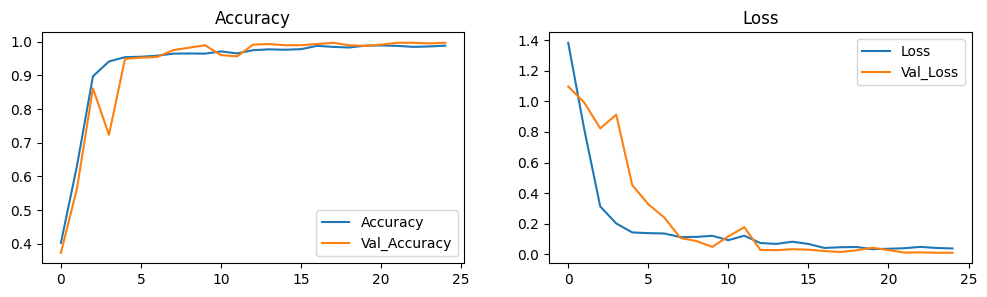

In [ ]:
from matplotlib import pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Accuracy')
plt.plot(epochs_range, val_acc, label='Val_Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Loss')
plt.plot(epochs_range, val_loss, label='Val_Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

In [ ]:
model.predict(validation_generator)

18/18 [==============================] - 3s 112ms/step


array([[1.0279714e-05, 9.9983025e-01, 1.5951662e-04],
       [2.4363935e-05, 9.9997461e-01, 1.0416162e-06],
       [5.2760314e-04, 6.6185721e-06, 9.9946576e-01],
       ...,
       [7.9243138e-05, 9.9961060e-01, 3.1014558e-04],
       [5.1444856e-04, 1.0764584e-04, 9.9937785e-01],
       [1.8888484e-05, 9.9997878e-01, 2.4303038e-06]], dtype=float32)